In [4]:
import pandas as pd
import datetime
import numpy as np
from pandas.io.data import DataReader


In [5]:
start_date=datetime.datetime(2004,1,12)
end_date=datetime.datetime(2015,11,12)


In [6]:
NYSE_advn = pd.DataFrame.from_csv('data/NYSE_advn.csv', header=None, sep=',')
NYSE_decln = pd.DataFrame.from_csv('data/NYSE_decln.csv', header=None, sep=',')

In [7]:
spx = DataReader("^GSPC", "yahoo", start_date, end_date)

In [8]:
td = pd.DataFrame(index=spx.index)

In [9]:
td["Today"]=spx["Adj Close"]

In [10]:
td["NYSE_advn"] = NYSE_advn[1][start_date:end_date]
td["NYSE_decln"] = NYSE_decln[1][start_date:end_date]

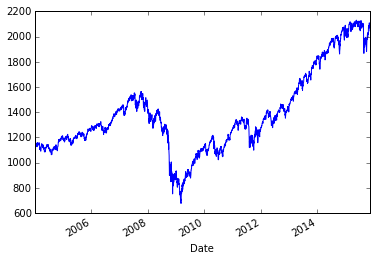

In [11]:
import matplotlib.pyplot as plt
from matplotlib.dates import  DateFormatter, WeekdayLocator, HourLocator, DayLocator, MONDAY
from matplotlib.finance import candlestick, plot_day_summary, candlestick2, candlestick_ochl
import matplotlib.dates as mdates
%matplotlib inline
td["Today"].plot()

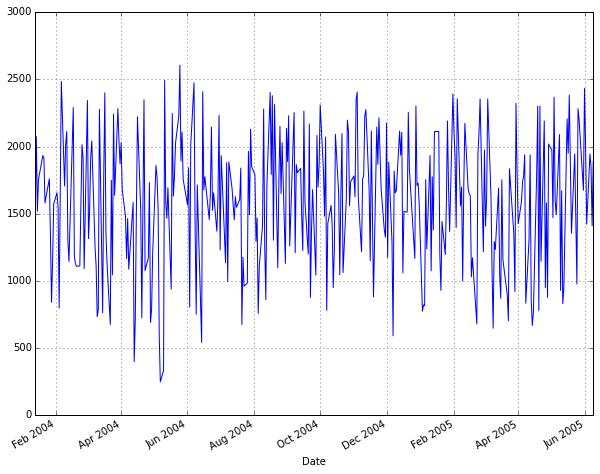

In [12]:
td["NYSE_advn"][1:356].plot(grid=True, figsize=(10,8))

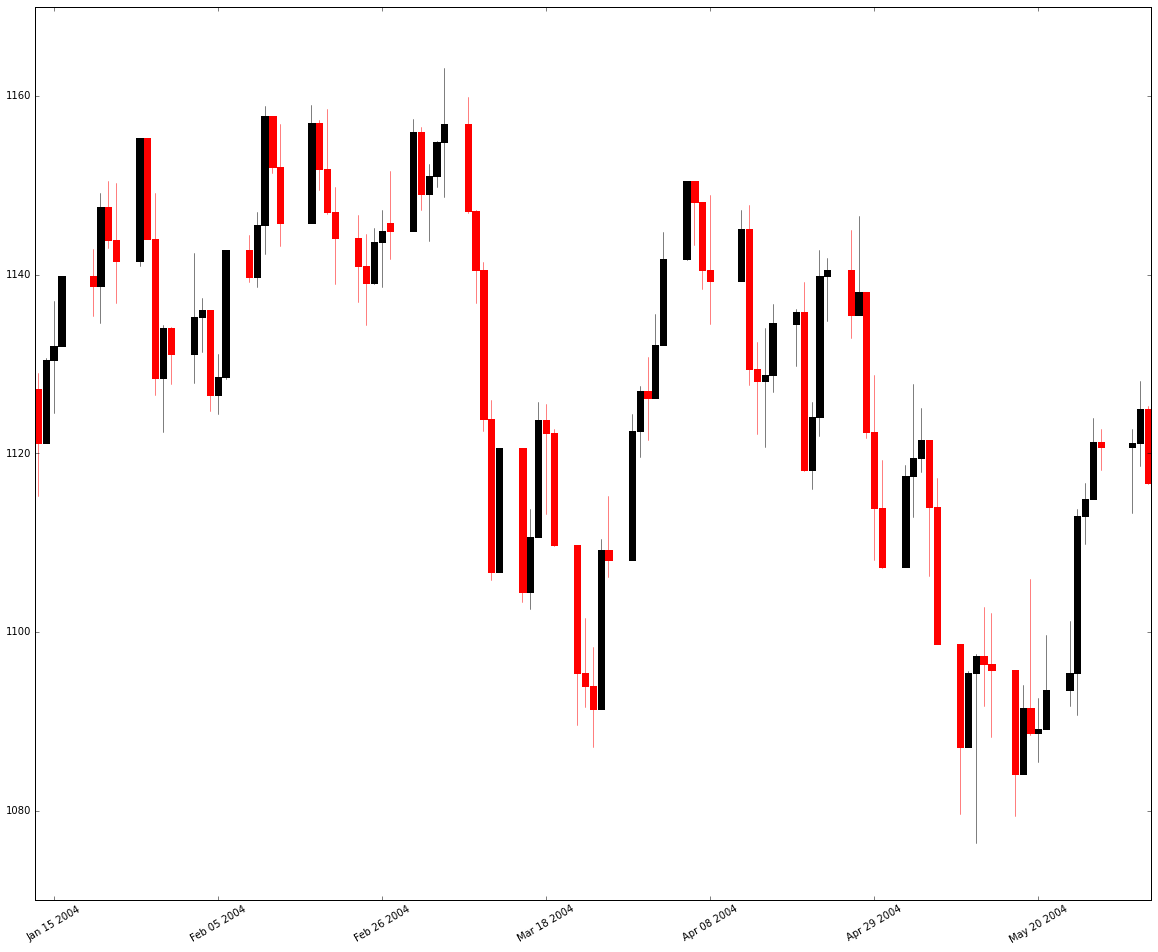

In [13]:
spx["mDate"] = mdates.date2num(spx.index.to_pydatetime())
datarec=[tuple(x) for x in spx[["mDate","Open","Close","High","Low"]].to_records(index=False)]
fig = plt.figure(figsize=(20,16))
ax1 = plt.subplot(1,1,1)
candlestick_ochl(ax1, datarec[1:100], width=0.8)
ax1.xaxis_date()
ax1.autoscale_view()
plt.setp(ax1.get_xticklabels(), rotation=30)
plt.show()

In [14]:
#Calculate McClellan Oscillator
RANA = (1000.0*(NYSE_advn-NYSE_decln)/(NYSE_advn+NYSE_decln))
RANA = RANA.apply(np.round)


In [15]:
#EMA19 calculation
def ema(data, window):
    c = 2.0 / (window + 1)
    current_ema = 0
    result_ema = []
    for value in data.itertuples():
        current_ema = (c * value[1]) + ((1 - c) * current_ema)
        result_ema.append(current_ema)
    data_ema = pd.DataFrame(result_ema, index=data.index)
    return data_ema


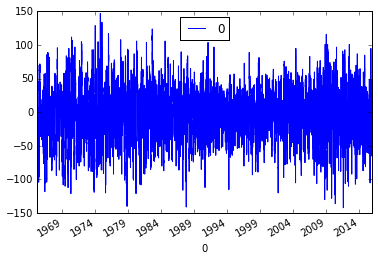

In [16]:
NYMO = ema(RANA, 19) - ema(RANA, 39)
NYMO = NYMO.apply(np.round)
NYMO.plot()


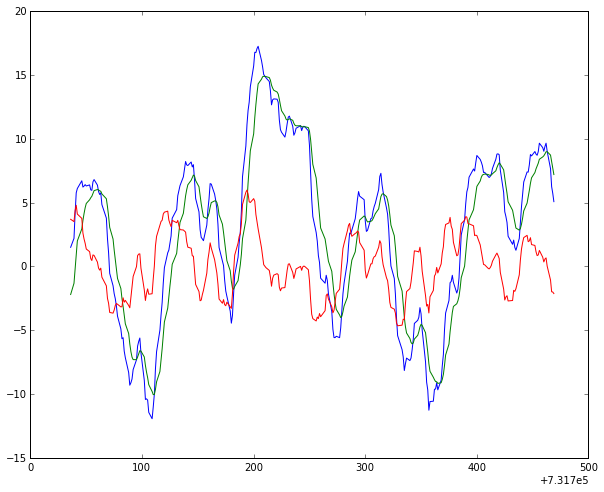

In [17]:
#calculate MACD
MACD = ema(spx, 12) - ema(spx, 26)
MACD_signal = ema(MACD, 9)
MACD_hist = MACD-MACD_signal
dates = mdates.date2num(MACD.index.to_pydatetime())
fig, ax=plt.subplots(figsize=(10,8))
plt.plot(dates[100:400],MACD[100:400])
plt.plot(dates[100:400],MACD_signal[100:400])
plt.plot(dates[100:400],MACD_hist[100:400])




In [18]:
#calcuate slow STO
LookBack = 14
DailyHigh = pd.DataFrame()
for i in xrange(0,LookBack):
    DailyHigh["high%s" % str(i)] = spx["High"].shift(i)
Highest = DailyHigh.max(axis=1)
DailyLow = pd.DataFrame()
for i in xrange(0,LookBack):
    DailyLow["low%s" % str(i)] = spx["Low"].shift(i)
Lowest = DailyLow.min(axis=1)
STO = 100*(spx["Close"]-Lowest)/(Highest-Lowest)

                             

